In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 一、概述

### 1. Artist的分类

Artist有两种类型： primitives 和containers<br>
primitive：是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文字text，矩形Rectangle，图像image等。<br>
container：是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。<br>

### 2. matplotlib标准用法
1）创建一个Figure 实例<br>
2）使用Figure 实例创建一个或者多个Axes 或Subplot 实例<br>
3）使用Axes 实例的辅助方法来创建primitive<br>

In [2]:
np.arange(5) ,np.arange(0, 1, 0.1)

(array([0, 1, 2, 3, 4]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

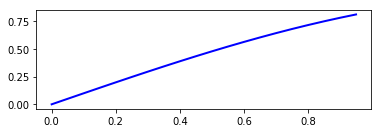

In [3]:
x = np.arange(0, 1, 0.05)
y = np.sin(x)
# step 1
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()
# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1)
# step 3
# 然后用Axes实例的方法画了一条曲线
ax.plot(x, y, color = "blue", lw = 2)

# 二、自定义Artist属性

在图形中的每一个元素都对应着一个matplotlib Artist.<br>
1）Figure 本身包含一个Rectangle，Rectangle的大小就是Figure的大小；你可以用来设置Figure的背景色和透明度。即 Figure.patch属性。<br>
2）Axes.patch属性：也是一个Rectangle，代表了绘图坐标轴内部的矩形框（白底黑边）， 通过它可以设置Axes的颜色、透明度等。即 Axes.patch属性。<br>

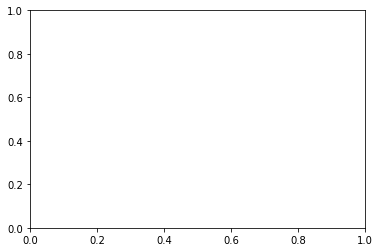

In [4]:
plt.figure()
plt.axes()

### 属性调用

所有属性都通过相应的 get_* 和 set_* 函数进行读写<br>
```
a = o.get_alpha()
o.set_alpha(0.5*a)
```
如果一次设置多个属性，也可以用set方法：<br>
```
o.set(alpha=0.5, zorder=2)
```

# 三、基本元素
```
1. 曲线-Line2D
2. 矩形-Rectangle
    ·hist-直方图
    ·bar-柱状图
    ·Polygon-多边形
    ·Wedge-契形
3. Collection
4. 图像-image
```

### a. Line2D

其中常用的的参数有：
```
xdata:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
ydata:需要绘制的line中点的在y轴上的取值
linewidth:线条的宽度
linestyle:线型
color:线条的颜色
marker:点的标记
markersize:标记的size
```

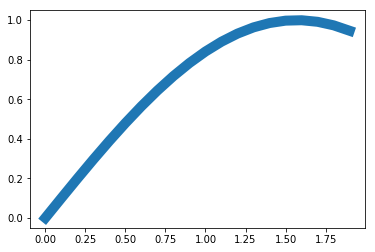

In [5]:
x = np.arange(0, 2, 0.1)
y = np.sin(x)
plt.plot(x, y, lw = 10)

### b. errorbar绘制误差折线图

其中最主要的参数是前几个:
```
x：需要绘制的line中点的在x轴上的取值
y：需要绘制的line中点的在y轴上的取值
yerr：指定y轴水平的误差
xerr：指定x轴水平的误差
fmt：指定折线图中某个点的颜色，形状，线条风格，例如‘co–’
ecolor：指定error bar的颜色
elinewidth：指定error bar的线条宽度
```

<ErrorbarContainer object of 3 artists>

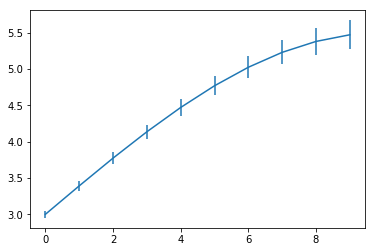

In [6]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

### c. hist-直方图

下面是一些常用的参数：
```
x: 数据集，最终的直方图将对数据集进行统计
bins: 统计的区间分布
range: tuple, 显示的区间，range在没有给出bins时生效
density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
histtype: 可选{‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
align: 可选{‘left’, ‘mid’, ‘right’}之一，默认为’mid’，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
log: bool，默认False,即y坐标轴是否选择指数刻度
stacked: bool，默认为False，是否为堆积状图
```

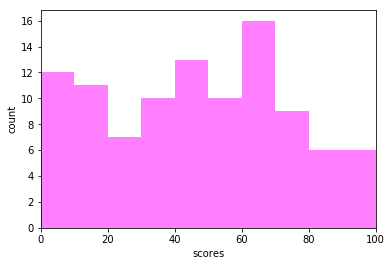

In [7]:
x=np.random.randint(0,100,100) #生成[0-100)之间的100个数据,即 数据集 
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100)#设置x轴分布范围 plt.show()
plt.show()

### d. bar-柱状图

下面是一些常用的参数：
```
left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串
height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；
alpha：透明度，值越小越透明
width：为柱形图的宽度，一般这是为0.8即可；
color或facecolor：柱形图填充的颜色；
edgecolor：图形边缘颜色
label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签
```

<BarContainer object of 16 artists>

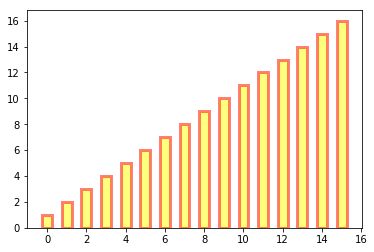

In [8]:
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3)

### e. Polygon-多边形

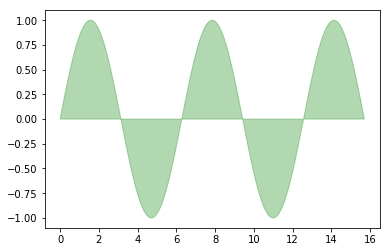

In [9]:
x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color = "g", alpha = 0.3)

### f. Wedge-契形

其中最主要的参数是前4个：
```
x：契型的形状，一维数组。
explode：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。
labels：用于指定每个契型块的标记，取值是列表或为None。
colors：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。
startangle：饼状图开始的绘制的角度。
```

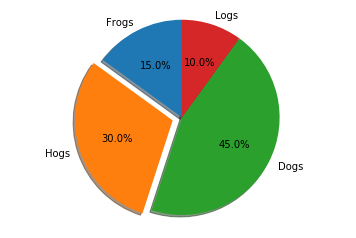

In [10]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

### g. collections

其中最主要的参数是前5个：
```
x：数据点x轴的位置
y：数据点y轴的位置
s：尺寸大小
c：可以是单个颜色格式的字符串，也可以是一系列颜色
marker: 标记的类型
```

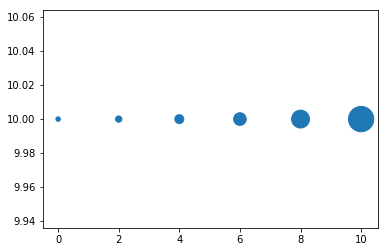

In [11]:
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 
plt.scatter(x,y,s=s) 
plt.show()

### h. image

images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像

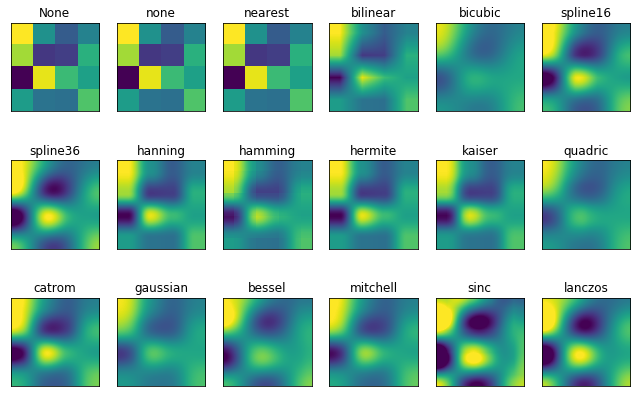

In [12]:
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

# 四、对象容器 - Object container

### 1. figure容器

matplotlib.figure.Figure是Artist最顶层的container-对象容器，它包含了图表中的所有元素。一张图表的背景就是在Figure.patch的一个矩形Rectangle。<br>
当我们向图表添加Figure.add_subplot()或者Figure.add_axes()元素时，这些都会被添加到Figure.axes列表中。

`figure容器的常见属性：`
```
Figure.patch属性：Figure的背景矩形
Figure.axes属性：一个Axes实例的列表（包括Subplot)
Figure.images属性：一个FigureImages patch列表
Figure.lines属性：一个Line2D实例的列表（很少使用）
Figure.legends属性：一个Figure Legend实例列表（不同于Axes.legends)
Figure.texts属性：一个Figure Text实例列表
```

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A71196EC88>, <matplotlib.axes._axes.Axes object at 0x000002A711E2CD30>]


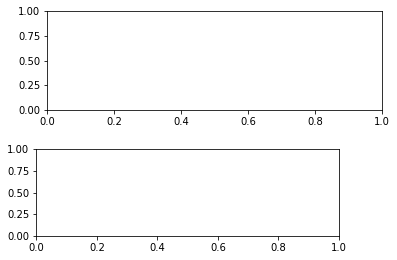

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的

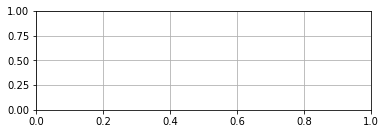

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)

### 2. Axes容器

`matplotlib.axes.Axes`是matplotlib的核心。<br>
大量的用于绘图的Artist存放在它内部，并且它有许多辅助方法来创建和添加Artist给它自己，而且它也有许多赋值方法来访问和修改这些Artist。<br>
和Figure容器类似，Axes包含了一个patch属性，对于笛卡尔坐标系而言，它是一个Rectangle；对于极坐标而言，它是一个Circle。<br>
这个patch属性决定了绘图区域的形状、背景和边框。<br>

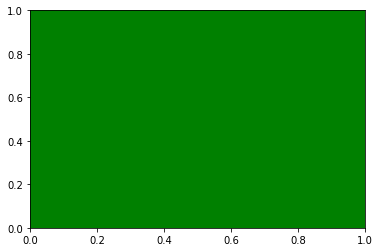

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

`Axes容器的常见属性有：`
```
artists: Artist实例列表
patch: Axes所在的矩形实例 
collections: Collection实例
images: Axes图像 
legends:Legend 实例 
lines: Line2D 实例
patches: Patch 实例 
texts: Text 实例 
xaxis: matplotlib.axis.XAxis 实例
yaxis: matplotlib.axis.YAxis 实例
```

### 3. Axis容器

```
`matplotlib.axis.Axis`实例处理tick line、grid line、tick label以及axis label的绘制，它包括坐标轴上的刻度线、刻度label、坐标网格、坐标轴标题。通常你可以独立的配置y轴的左边刻度以及右边的刻度，也可以独立地配置x轴的上边刻度以及下边的刻度。
刻度包括主刻度和次刻度，它们都是Tick刻度对象。
Axis也存储了用于自适应，平移以及缩放的data_interval和view_interval。它还有Locator实例和Formatter实例用于控制刻度线的位置以及刻度label。
每个Axis都有一个label属性，也有主刻度列表和次刻度列表。这些ticks是axis.XTick和axis.YTick实例，它们包含着line primitive以及text primitive用来渲染刻度线以及刻度文本。
刻度是动态创建的，只有在需要创建的时候才创建（比如缩放的时候）。Axis也提供了一些辅助方法来获取刻度文本、刻度线位置等等：
常见的如下：
```

array([-0.2,  4.2])

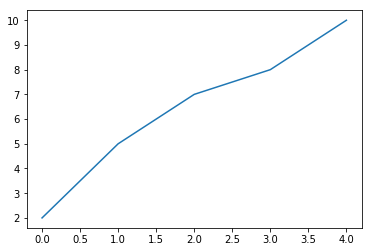

In [16]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔

调整一些轴和刻度的属性

In [17]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_color('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

plt.show()
`

SyntaxError: invalid syntax (<ipython-input-17-bd8051540f12>, line 23)

### 4. Tick容器

```
matplotlib.axis.Tick是从Figure到Axes到Axis到Tick中最末端的容器对象。
Tick包含了tick、grid line实例以及对应的label。

所有的这些都可以通过Tick的属性获取，常见的tick属性有
Tick.tick1line：Line2D实例
Tick.tick2line：Line2D实例
Tick.gridline：Line2D实例
Tick.label1：Text实例
Tick.label2：Text实例

y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。
x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。```

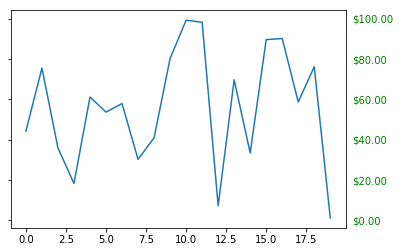

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()

# 五、作业 

```教程中展示的案例都是单一图，请自行创建数据，画出包含6个子图的线图，要求：
子图排布是 2 * 3 （2行 3列）；
线图可用教程中line2D方法绘制；
需要设置每个子图的横坐标和纵坐标刻度；
并设置整个图的标题，横坐标名称，以及纵坐标名称```

```
分别用一组长方形柱和填充面积的方式模仿画出下图，函数 y = -1 * (x - 2) * (x - 8) +10 在区间[2,9]的积分面积
```